In [21]:
import pandas as pd
import numpy as np

In [22]:
# randomly assign "yes" or "no" values
def YesOrNo(size):
    values =np.random.choice(["yes", "no"], size=size)  
    return values

In [23]:
ages = np.random.randint(20, 60, size=100)  # generate 100 random ages between 20 and 60
weights = np.random.uniform(50, 131, size=100)  # generate 100 random weights between 50 and 130 (Remember must be 1 more) kg
heights = np.random.randint(150, 200, size=100)  # generate 100 random heights between 150 and 200
genders = np.random.choice(["men", "women"], size=100)  # randomly assign "men" or "women" values
smoking_status = YesOrNo(100)
ill_status = YesOrNo(100)

In [41]:
df = pd.DataFrame({
    "age": ages,
    "weight": weights,
    "height": heights,
    "is_smoke": smoking_status,
    "gender": genders,
    "is_ill": ill_status
})

In [56]:
from sklearn.preprocessing import LabelEncoder

# create a label encoder object
le = LabelEncoder()

# fit the label encoder to the "gender" column
le.fit(df["gender"])

# transform the "gender" column using the label encoder
df["gender"] = le.transform(df["gender"])

# print the encoded column
print(df["gender"])


# create a label encoder object
le = LabelEncoder()

# fit the label encoder to the "is_smoke" column
le.fit(df["is_smoke"])

# transform the "is_smoke" column using the label encoder
df["is_smoke"] = le.transform(df["is_smoke"])


# create a label encoder object
le = LabelEncoder()

# fit the label encoder to the "is_ill" column
le.fit(df["is_ill"])

# transform the "is_smoke" column using the label encoder
df["is_ill"] = le.transform(df["is_ill"])


# print the encoded column
print(df["is_ill"])

0     1
1     1
2     1
3     1
4     1
     ..
95    0
96    1
97    1
98    1
99    0
Name: gender, Length: 100, dtype: int64
0     0
1     1
2     1
3     0
4     0
     ..
95    1
96    0
97    1
98    0
99    0
Name: is_ill, Length: 100, dtype: int64


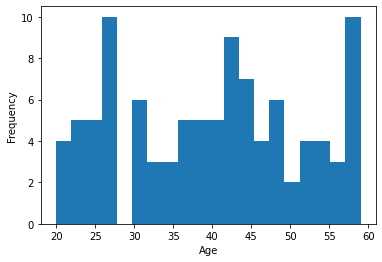

In [57]:
import matplotlib.pyplot as plt

df['age'].plot(kind='hist', bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


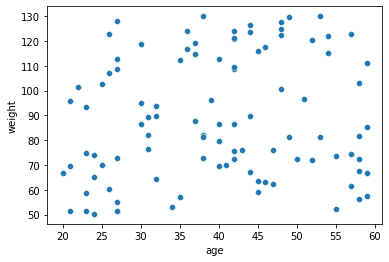

In [58]:
import seaborn as sns

sns.scatterplot(x='age', y='weight', data=df)
plt.show()


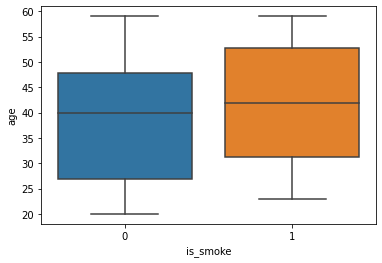

In [60]:
sns.boxplot(x='is_smoke', y='age', data=df)
plt.show()

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# define input features and target variable
X = df[['age', 'weight', 'height', 'is_smoke', 'gender']]
y = df['is_ill']

print(f'x is {X}')
print(f'\n \n \n \n')
print(f'y is {y}')


# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create linear regression model
model = LinearRegression()

# train the model on training data
model.fit(X_train, y_train)

# make predictions on testing data
y_pred = model.predict(X_test)

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

x is     age      weight  height  is_smoke  gender
0    23   93.178591     183         0       1
1    26   60.151713     153         0       1
2    27   51.562413     164         0       1
3    32   89.668633     171         1       1
4    24   65.061397     181         0       1
..  ...         ...     ...       ...     ...
95   44   66.971448     198         1       0
96   44  126.309545     156         0       1
97   27  108.513593     159         0       1
98   32   64.478363     172         1       1
99   42   72.580648     191         1       0

[100 rows x 5 columns]

 
 
 

y is 0     0
1     1
2     1
3     0
4     0
     ..
95    1
96    0
97    1
98    0
99    0
Name: is_ill, Length: 100, dtype: int64
Mean squared error: 0.272295261965393


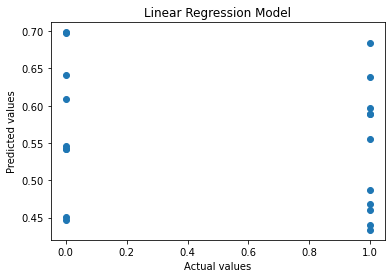

In [63]:
import matplotlib.pyplot as plt

# plot predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Linear Regression Model')
plt.show()

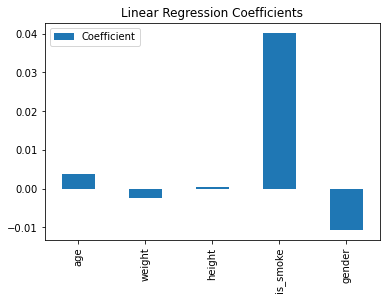

In [64]:
# plot coefficients
coef = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coef.plot(kind='bar')
plt.title('Linear Regression Coefficients')
plt.show()
